#1.5.2 Harris Corner Detection

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = 'sign2.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

In [3]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

In [4]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

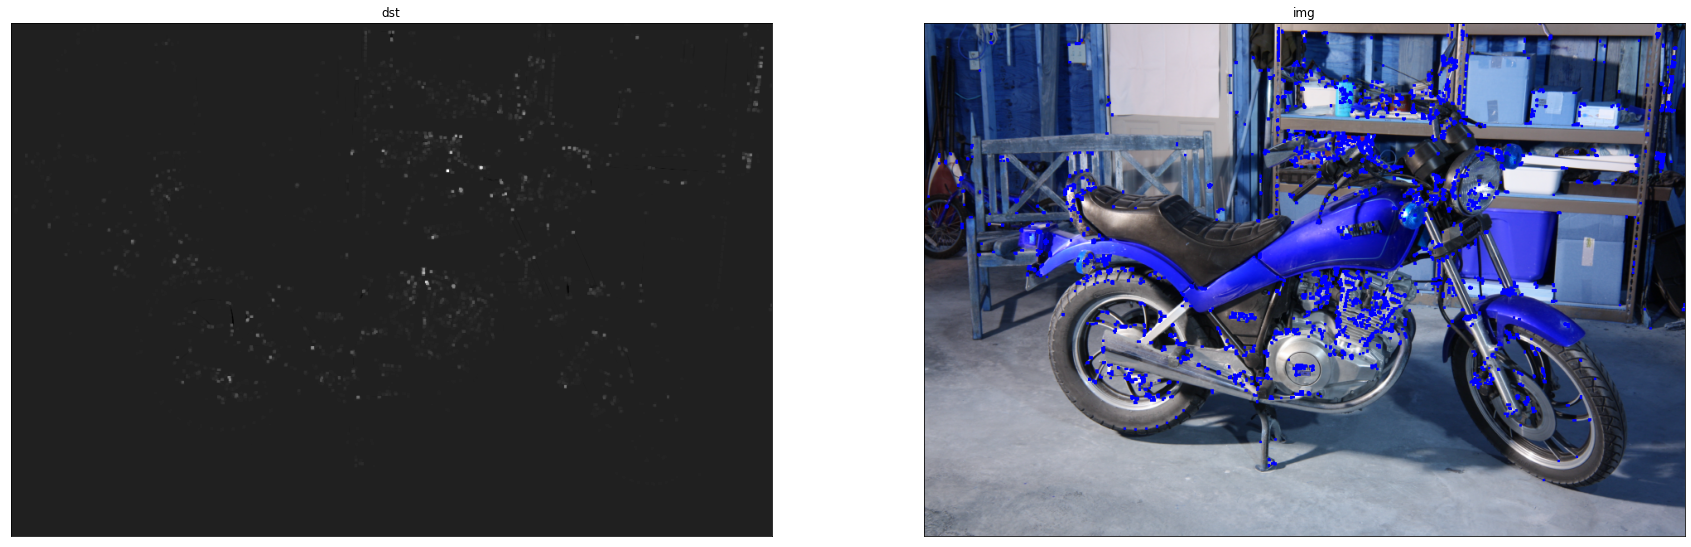

In [5]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(dst,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [9]:
def nothing(x):
    pass

In [ ]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()

In [14]:
print(res)

NameError: name 'res' is not defined

Corner with SubPixel Accuracy

In [9]:
import cv2
import numpy as np

In [10]:
filename = 'horse.bmp'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [12]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\connectedcomponents.cpp:3958: error: (-215:Assertion failed) iDepth == CV_8U || iDepth == CV_8S in function 'cv::connectedComponents_sub1'


In [13]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

NameError: name 'centroids' is not defined

In [14]:
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

NameError: name 'centroids' is not defined

In [15]:
cv2.imwrite('subpixel5.png',img)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
filename = 'horse.bmp'
img = cv2.imread(filename)
oimg = cv2.imread(filename)
img[res[:,1],res[:,0]]=[255,0,0]
img[res[:,3],res[:,2]] = [0,255,0]

NameError: name 'res' is not defined

In [10]:
for i in range(res.shape[0]):
    cv2.circle(img,(res[i,0],res[i,1]),3,(255,0,0),-1)
    cv2.circle(oimg,(res[i,2],res[i,3]),5,(0,255,0),-1)

NameError: name 'res' is not defined

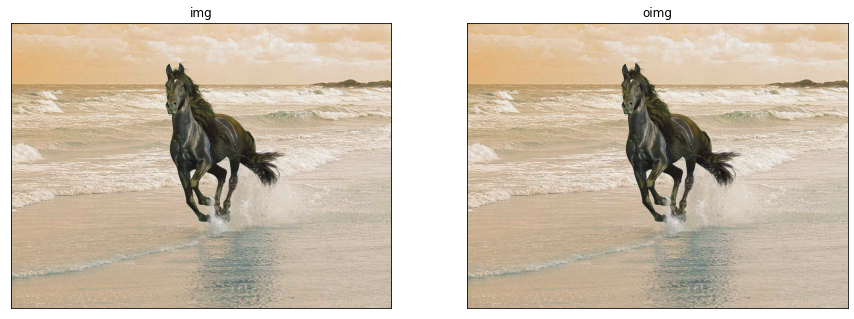

In [11]:
plt.figure(figsize=(15,30))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(oimg,cmap = 'gray')
plt.title('oimg'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('horse.bmp')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

In [5]:
img = cv2.imread('horse.bmp')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('horse-beach.bmp')
imgsift=cv2.drawKeypoints(img,kp,imgsift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

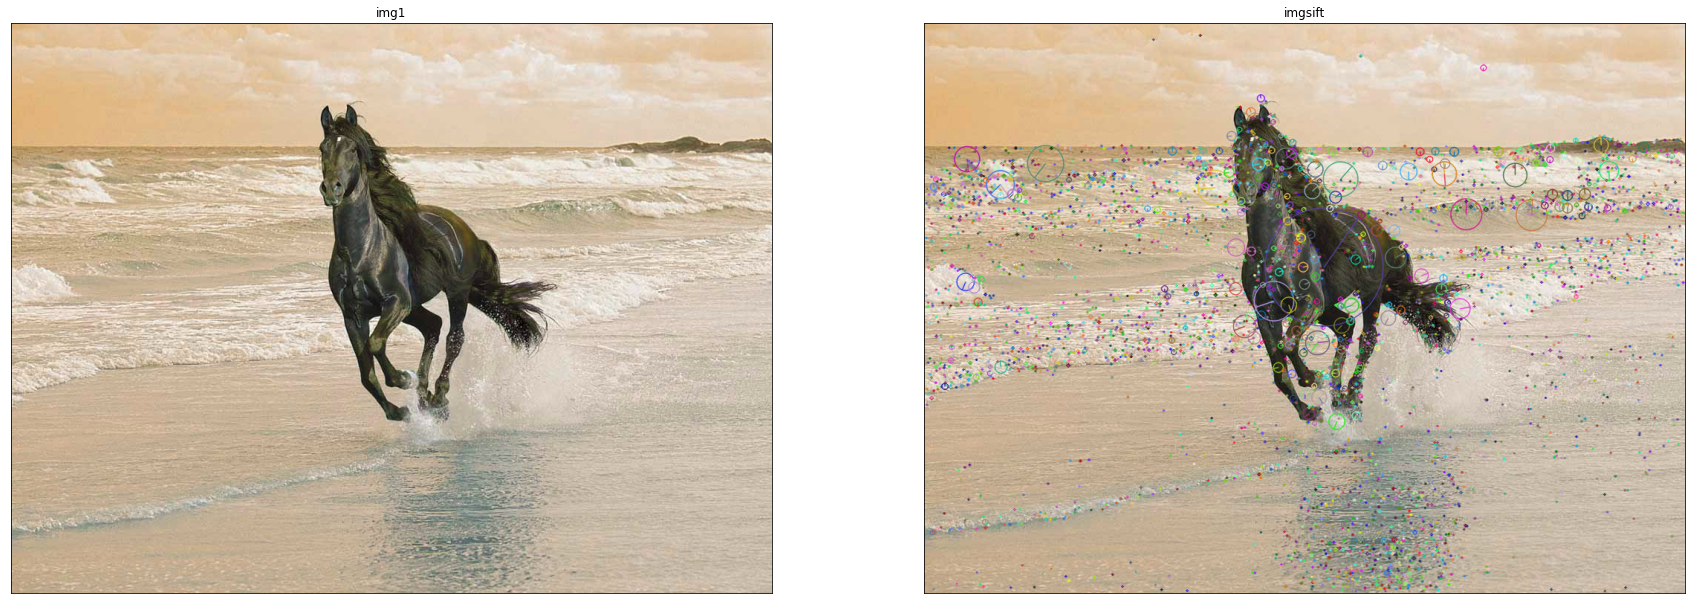

In [7]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('img1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgsift,cmap = 'gray')
plt.title('imgsift'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img = cv2.imread('horse.bmp')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift=cv2.drawKeypoints(gray,kp)
cv2.imwrite('sift_keypoints.jpg',img1)
img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img2)